## importing libraries 

In [1]:
%matplotlib inline
# for linear algebra
import numpy as np
#for data plotting
import matplotlib.pyplot as plt
#for importing datasets
import pandas as pd
import seaborn as sns
#for train test splitting.
from sklearn.model_selection import train_test_split
# for training different models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# for model error estimation
from sklearn.metrics import r2_score

In [2]:
outlet_data=pd.read_csv('..\dataset\\food_outlet_data.csv')

In [3]:
outlet_data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
outlet_data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
outlet_data.isnull()

,population,profit
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
92,False,False
93,False,False
94,False,False
95,False,False


In [6]:
train_outlet_data,test_outlet_data=train_test_split(outlet_data,test_size=0.2,random_state=49)

In [7]:
train_outlet_data.describe()

,population,profit
count,77.000000,77.000000
mean,7.628410,4.825103
std,2.983177,4.417245
min,5.026900,-2.680700
25%,5.729200,1.844000
50%,6.547900,4.116400
75%,8.408400,6.731800
max,21.279000,20.992000


In [8]:
#splitting features and labels and converting it to numpy array of size(m,1)

In [9]:
train_outlet_feature_set=train_outlet_data['population'].values.reshape(-1,1)

In [10]:
train_outlet_label_set=train_outlet_data['profit'].values.reshape(-1,1)

In [11]:
train_outlet_label_set.shape

(77, 1)

In [12]:
# plotting the graph.

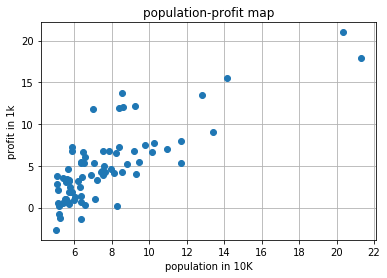

In [13]:
plt.plot(train_outlet_feature_set,train_outlet_label_set,'o')
plt.xlabel('population in 10K')
plt.ylabel('profit in 1k')
plt.title('population-profit map')
plt.grid(True)
plt.show()

(array([40., 15., 12.,  3.,  3.,  2.,  0.,  0.,  0.,  2.]),
 array([ 5.0269 ,  6.65211,  8.27732,  9.90253, 11.52774, 13.15295,
        14.77816, 16.40337, 18.02858, 19.65379, 21.279  ]),
 <a list of 10 Patch objects>)

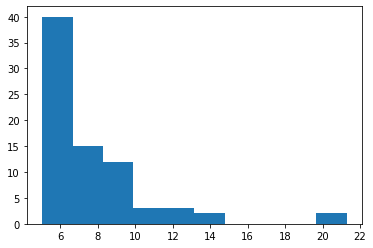

In [14]:
plt.hist(train_outlet_feature_set)

(array([ 4., 18., 21., 16.,  9.,  0.,  6.,  1.,  1.,  1.]),
 array([-2.6807 , -0.31343,  2.05384,  4.42111,  6.78838,  9.15565,
        11.52292, 13.89019, 16.25746, 18.62473, 20.992  ]),
 <a list of 10 Patch objects>)

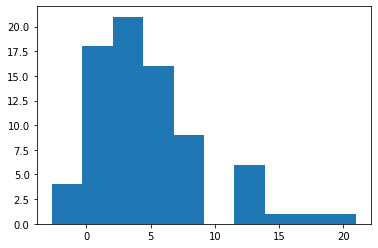

In [15]:
plt.hist(train_outlet_label_set)

## model training

In [16]:
model1=LinearRegression().fit(train_outlet_feature_set,train_outlet_label_set)

In [17]:
model2=DecisionTreeRegressor().fit(train_outlet_feature_set,train_outlet_label_set)

In [18]:
model3=Ridge().fit(train_outlet_feature_set,train_outlet_label_set)

In [19]:
model4=RandomForestRegressor().fit(train_outlet_feature_set,train_outlet_label_set)

C:\Users\NIRBHAY MAURYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


## model evaluation

In [20]:
test_outlet_feature_set=test_outlet_data['population'].values.reshape(-1,1)

In [21]:
test_outlet_label_set=test_outlet_data['profit'].values.reshape(-1,1)

In [22]:
predict_1=model1.predict(test_outlet_feature_set)
predict_2=model2.predict(test_outlet_feature_set)
predict_3=model3.predict(test_outlet_feature_set)
predict_4=model4.predict(test_outlet_feature_set)

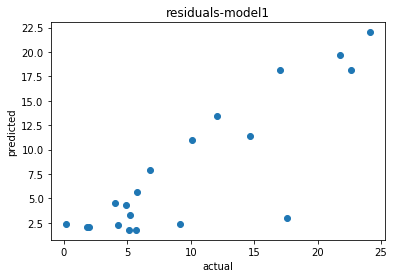

In [23]:
plt.plot(test_outlet_label_set,predict_1,'o')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('residuals-model1')
plt.show()

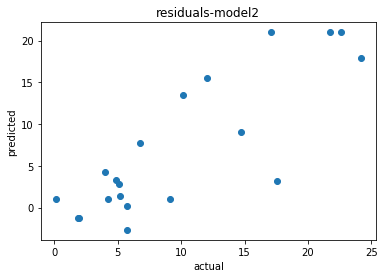

In [24]:
plt.plot(test_outlet_label_set,predict_2,'o')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('residuals-model2')
plt.show()

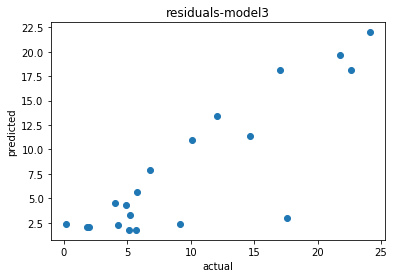

In [25]:
plt.plot(test_outlet_label_set,predict_3,'o')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('residuals-model3')
plt.show()

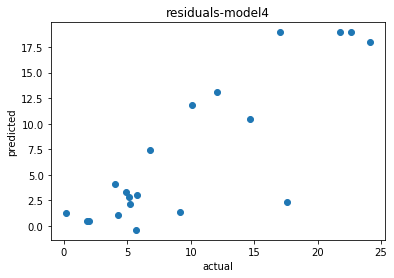

In [26]:
plt.plot(test_outlet_label_set,predict_4,'o')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('residuals-model4')
plt.show()

## r2_scores

In [27]:
md1=r2_score(test_outlet_label_set,predict_1)
md2=r2_score(test_outlet_label_set,predict_2)
md3=r2_score(test_outlet_label_set,predict_3)
md4=r2_score(test_outlet_label_set,predict_4)

In [28]:
print('r2_score for model1:',md1)
print('r2_score for model2:',md2)
print('r2_score for model3:',md3)
print('r2_score for model4:',md4)

r2_score for model1: 0.6734753592472632
r2_score for model2: 0.4819387943762441
r2_score for model3: 0.6733445655455184
r2_score for model4: 0.565642820626294


In [29]:
#from above we can see linearregressor is performing well.

# exporting model

In [30]:
import joblib

In [31]:
joblib.dump(model1,'profit_predictor.joblib')

['profit_predictor.joblib']